In [170]:
#Import Necessary Libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier #ANN
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [171]:
#reading the data into pandas dataframe

train = pd.read_csv('wdbc.csv')

In [172]:
train.head()

,ID,Diagnosis,radius_1,texture_1,parameter_1,area_1,smoothness_1,compactness_1,concavity_1,concave points_1,...,radius_3,texture_3,parameter_3,area_3,smoothness_3,compactness_3,concavity_3,concave points_3,symmetry_3,fractal dimension_3
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [173]:
# Train Test Split

x_train, x_test, y_train, y_test = train_test_split(train.drop("Diagnosis",axis=1),
                                                    train['Diagnosis'], test_size=0.20,
                                                    random_state=101)

In [ ]:
#Random Forest 

classifier_rf = RandomForestClassifier()
classifier_rf.fit(x_train, y_train)

RandomForestClassifier()

In [175]:
y_pred_rf = classifier_rf.predict(x_test)

In [176]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:",accuracy_rf)

Accuracy: 0.9736842105263158


In [177]:
print("Classification Report:") 
print(classification_report(y_test, y_pred_rf))

Classification Report:
              precision    recall  f1-score   support

           B       0.97      0.99      0.98        72
           M       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [178]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Confusion Matrix:
[[71  1]
 [ 2 40]]


Random Forest Accuracy: 0.9737
              precision    recall  f1-score   support

           B       0.97      0.99      0.98        72
           M       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



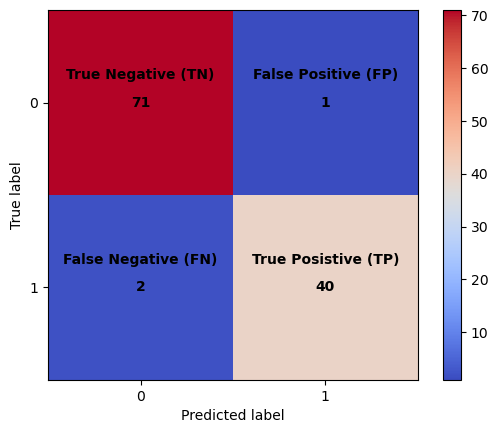

In [179]:
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(classification_report(y_test, y_pred_rf))

#Confusion Matrix 
con_matrix_rf = confusion_matrix(y_test, y_pred_rf) 

#Plot confusion matrix 
disp = ConfusionMatrixDisplay(confusion_matrix=con_matrix_rf, display_labels=[0, 1])
disp.plot(cmap='coolwarm', text_kw={'color': 'black', 'fontsize': 10, 'fontweight': 'bold'})
                                    
#Add labels directly on top of the numbers
labels = [["True Negative (TN)", "False Positive (FP)"], ["False Negative (FN)", "True Posistive (TP)"]]

for i in range(2): 
    for j in range(2): 
        plt.text(j, i - 0.15, labels[i][j], ha='center', va='center', color='black', fontsize=10, fontweight='bold')

In [180]:
#ANN

classifier_ann = MLPClassifier(max_iter=500)
classifier_ann.fit(x_train, y_train)

MLPClassifier(max_iter=500)

ANN Accuracy: 0.6140
              precision    recall  f1-score   support

           B       0.62      0.97      0.76        72
           M       0.00      0.00      0.00        42

    accuracy                           0.61       114
   macro avg       0.31      0.49      0.38       114
weighted avg       0.39      0.61      0.48       114



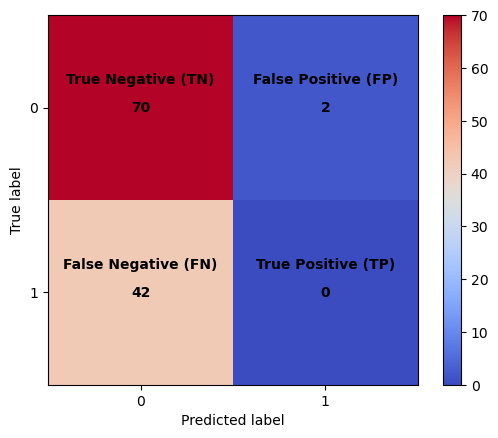

In [181]:
y_pred_ann = classifier_ann.predict(x_test)
accuracy_ann = accuracy_score(y_test, y_pred_ann)

print(f"ANN Accuracy: {accuracy_ann:.4f}")
print(classification_report(y_test, y_pred_ann))


# Confusion Matrix
conf_matrix_ann = confusion_matrix(y_test, y_pred_ann)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_ann, display_labels=[0, 1])
disp.plot(cmap='coolwarm', text_kw={'color': 'black', 'fontsize': 10, 'fontweight': 'bold'})
# Add labels directly on top of the numbers
labels = [["True Negative (TN)", "False Positive (FP)"], ["False Negative (FN)", "True Positive (TP)"]]
for i in range(2):
    for j in range(2):
        plt.text(j, i - 0.15, labels[i][j], ha='center', va='center', color='black', fontsize=10, fontweight='bold')

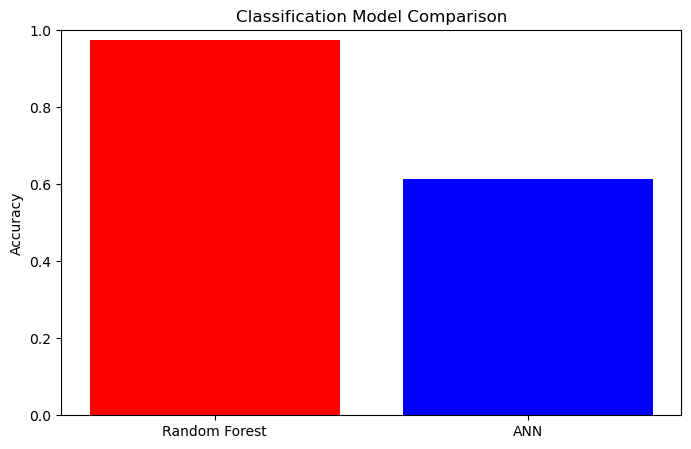

In [182]:
#Plot Classification Model Comparison Results

models_class = ["Random Forest", "ANN"]
accuracy_scores = [accuracy_rf, accuracy_ann]

plt.figure(figsize=(8,5))
plt.bar(models_class, accuracy_scores, color=['red', 'blue'])
plt.ylabel("Accuracy")
plt.title("Classification Model Comparison")
plt.ylim(0, 1)
plt.show()

In [183]:
#Define Hyperparameter Grid for Both Models (only using the training set)

# For Random Forest Classifier
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# For Neural Network Classifier (ANN)
param_grid_ann = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'max_iter': [500]
}

#Function to Optimize Models using GridSearchCV
def optimize_model(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    print(f"Best Parameters for {model.__class__.__name__}: {grid_search.best_params_}")
    return grid_search.best_estimator_

#Model Training & Optimization for Classification

# Random Forest
rf_classifier_opt = optimize_model(RandomForestClassifier(), param_grid_rf, x_train, y_train)
y_test_pred_rf_opt = rf_classifier_opt.predict(x_test)
test_acc_rf_opt = accuracy_score(y_test, y_test_pred_rf_opt)
print(f"Optimized Random Forest Test Accuracy: {test_acc_rf_opt:.4f}")
print(classification_report(y_test, y_test_pred_rf_opt))


# Artificial Neural Network
ann_classifier_opt = optimize_model(MLPClassifier(max_iter=500), param_grid_ann, x_train, y_train)
y_test_pred_ann_opt = ann_classifier_opt.predict(x_test)
test_acc_ann_opt = accuracy_score(y_test, y_test_pred_ann_opt)
print(f"Optimized ANN Test Accuracy: {test_acc_ann_opt:.4f}")
print(classification_report(y_test, y_test_pred_ann_opt))

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters for RandomForestClassifier: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Optimized Random Forest Test Accuracy: 0.9825
              precision    recall  f1-score   support

           B       0.99      0.99      0.99        72
           M       0.98      0.98      0.98        42

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters for MLPClassifier: {'activation': 'relu', 'hidden_layer_sizes': (50,), 'max_iter': 500, 'solver': 'adam'}
Optimized ANN Test Accuracy: 0.6316
              precision    recall  f1-score   support

           B       0.64      0.97      0.77        72
           M       0.50      0.05      0.09        42

    accuracy                           0.63       114

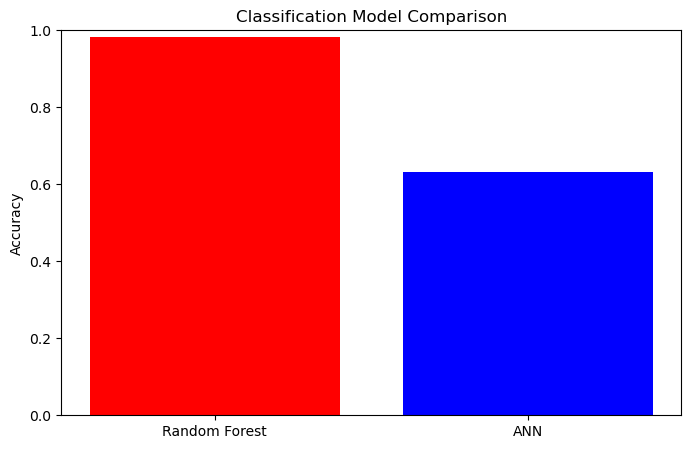

In [184]:
models_class = ["Random Forest", "ANN"]
accuracy_scores = [test_acc_rf_opt, test_acc_ann_opt]

plt.figure(figsize=(8,5))
plt.bar(models_class, accuracy_scores, color=['red', 'blue'])
plt.ylabel("Accuracy")
plt.title("Classification Model Comparison")
plt.ylim(0, 1)
plt.show()